PageRank 算法经常被用到网络关系的分析中，比如在社交网络中计算个人的影响力，计算论文的影响力或者网站的影响力等。

今天我们就来做一个关于 PageRank 算法的实战，在这之前，你需要思考三个问题：

1、如何使用工具完成 PageRank 算法，包括使用工具创建网络图，设置节点、边、权重等，并通过创建好的网络图计算节点的 PR 值；

2、对于一个实际的项目，比如希拉里的 9306 封邮件（工具包中邮件的数量），如何使用 PageRank 算法挖掘出有影响力的节点，并且绘制网络图；

3、如何对创建好的网络图进行可视化，如果网络中的节点数较多，如何筛选重要的节点进行可视化，从而得到精简的网络关系图。

**如何使用工具实现 PageRank 算法**

PageRank 算法工具在 sklearn 中并不存在，我们需要找到新的工具包。实际上有一个关于图论和网络建模的工具叫 NetworkX，它是用 Python 语言开发的工具，内置了常用的图与网络分析算法，可以方便我们进行网络数据分析。

上节课，我举了一个网页权重的例子，假设一共有 4 个网页 A、B、C、D，它们之间的链接信息如图所示：

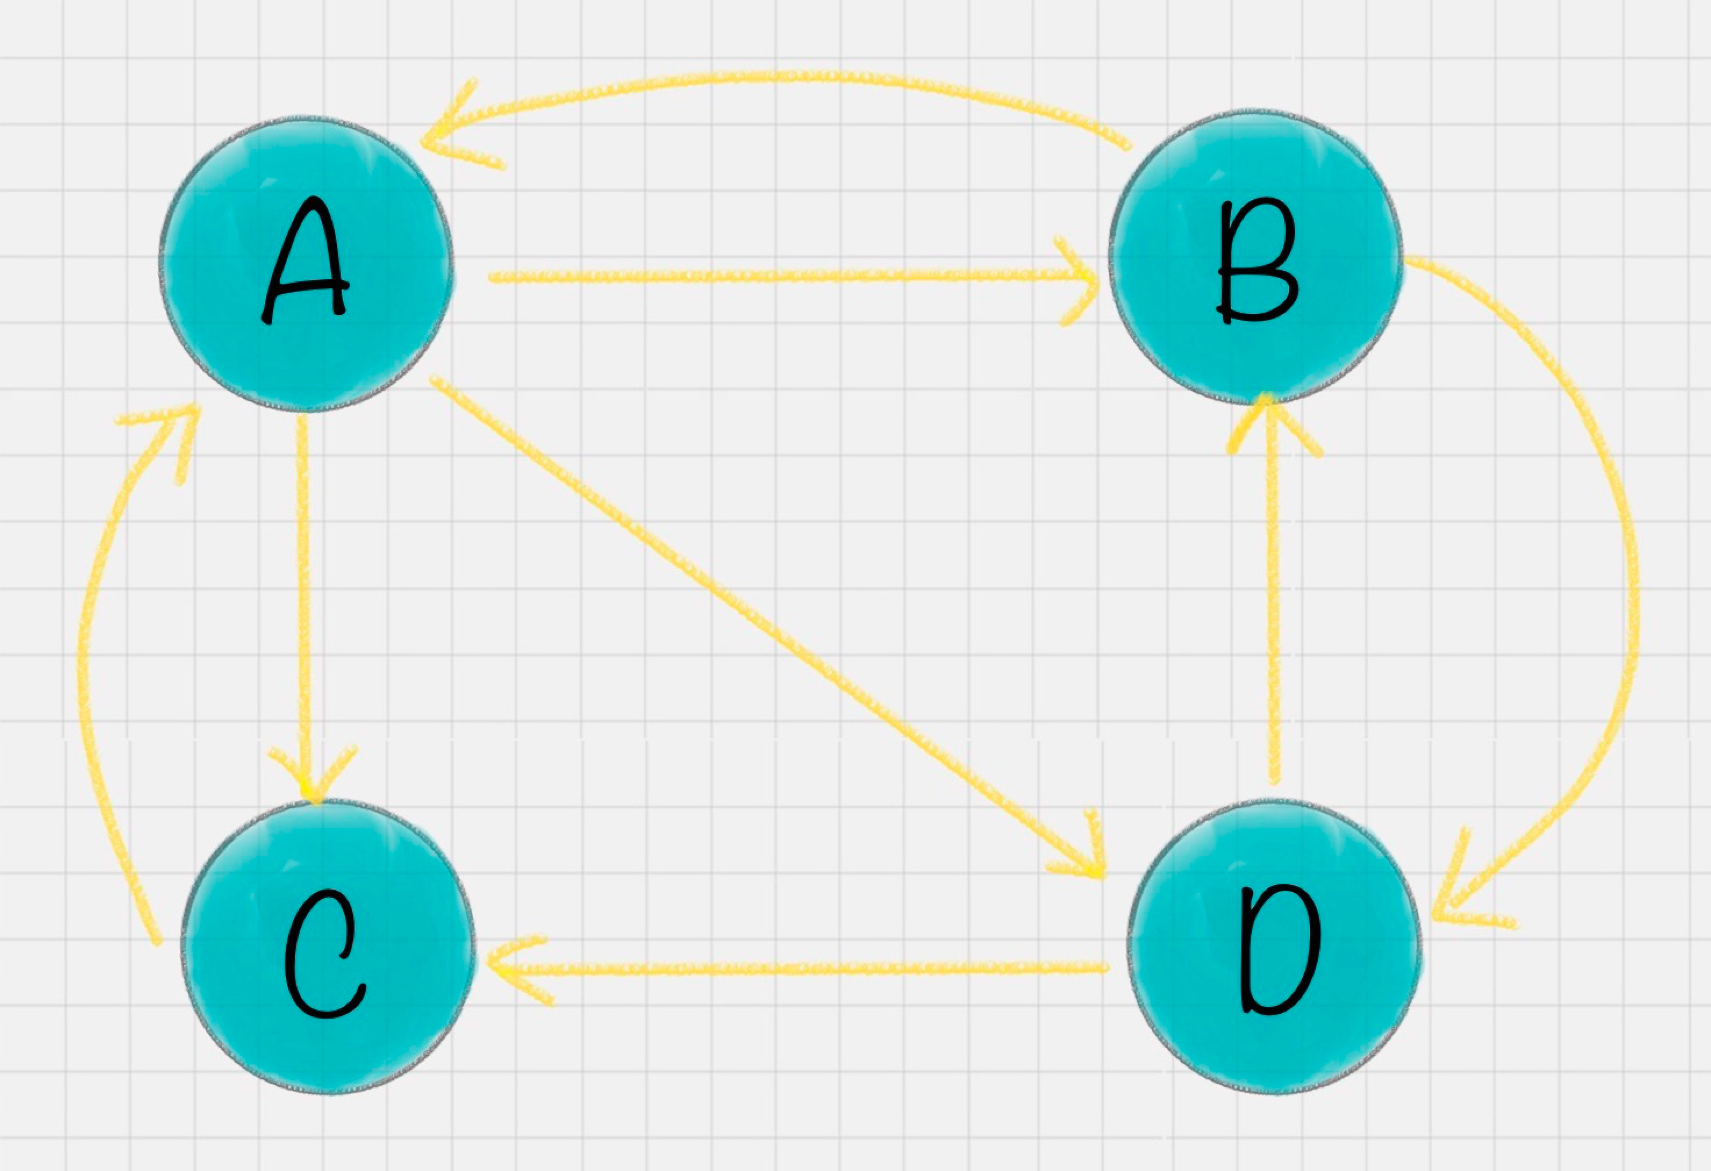

针对这个例子，我们看下用 NetworkX 如何计算 A、B、C、D 四个网页的 PR 值，具体代码如下：

In [1]:

import networkx as nx
# 创建有向图
G = nx.DiGraph() 
# 有向图之间边的关系
edges = [("A", "B"), ("A", "C"), ("A", "D"), ("B", "A"), ("B", "D"), ("C", "A"), ("D", "B"), ("D", "C")]
for edge in edges:
    G.add_edge(edge[0], edge[1])
pagerank_list = nx.pagerank(G, alpha=1)
print("pagerank值是：", pagerank_list)

pagerank值是： {'A': 0.33333396911621094, 'B': 0.22222201029459634, 'C': 0.22222201029459634, 'D': 0.22222201029459634}


我们通过 NetworkX 创建了一个有向图之后，设置了节点之间的边，然后使用 PageRank 函数就可以求得节点的 PR 值，结果和上节课中我们人工模拟的结果一致。

好了，运行完这个例子之后，我们来看下 NetworkX 工具都有哪些常用的操作。

1. 关于图的创建

    图可以分为无向图和有向图，在 NetworkX 中分别采用不同的函数进行创建。无向图指的是不用节点之间的边的方向，使用 nx.Graph() 进行创建；有向图指的是节点之间的边是有方向的，使用 nx.DiGraph() 来创建。在上面这个例子中，存在 A→D 的边，但不存在 D→A 的边。

2. 关于节点的增加、删除和查询

    如果想在网络中增加节点，可以使用 G.add_node(‘A’) 添加一个节点，也可以使用 G.add_nodes_from([‘B’,‘C’,‘D’,‘E’]) 添加节点集合。如果想要删除节点，可以使用 G.remove_node(node) 删除一个指定的节点，也可以使用 G.remove_nodes_from([‘B’,‘C’,‘D’,‘E’]) 删除集合中的节点。

    那么该如何查询节点呢？

    如果你想要得到图中所有的节点，就可以使用 G.nodes()，也可以用 G.number_of_nodes() 得到图中节点的个数。

3. 关于边的增加、删除、查询

    增加边与添加节点的方式相同，使用 G.add_edge(“A”, “B”) 添加指定的“从 A 到 B”的边，也可以使用 add_edges_from 函数从边集合中添加。我们也可以做一个加权图，也就是说边是带有权重的，使用 add_weighted_edges_from 函数从带有权重的边的集合中添加。在这个函数的参数中接收的是 1 个或多个三元组[u,v,w]作为参数，u、v、w 分别代表起点、终点和权重。

    另外，我们可以使用 remove_edge 函数和 remove_edges_from 函数删除指定边和从边集合中删除。

    另外可以使用 edges() 函数访问图中所有的边，使用 number_of_edges() 函数得到图中边的个数。

    以上是关于图的基本操作，如果我们创建了一个图，并且对节点和边进行了设置，就可以找到其中有影响力的节点，原理就是通过 PageRank 算法，使用 nx.pagerank(G) 这个函数，函数中的参数 G 代表创建好的图。

**如何用 PageRank 揭秘希拉里邮件中的人物关系**

了解了 NetworkX 工具的基础使用之后，我们来看一个实际的案例：希拉里邮件人物关系分析。

希拉里邮件事件相信你也有耳闻，对这个数据的背景我们就不做介绍了。你可以从 GitHub 上下载这个数据集：https://github.com/cystanford/PageRank。

整个数据集由三个文件组成：Aliases.csv，Emails.csv 和 Persons.csv，其中 Emails 文件记录了所有公开邮件的内容，发送者和接收者的信息。Persons 这个文件统计了邮件中所有人物的姓名及对应的 ID。因为姓名存在别名的情况，为了将邮件中的人物进行统一，我们还需要用 Aliases 文件来查询别名和人物的对应关系。

整个数据集包括了 9306 封邮件和 513 个人名，数据集还是比较大的。不过这一次我们不需要对邮件的内容进行分析，只需要通过邮件中的发送者和接收者（对应 Emails.csv 文件中的 MetadataFrom 和 MetadataTo 字段）来绘制整个关系网络。因为涉及到的人物很多，因此我们需要通过 PageRank 算法计算每个人物在邮件关系网络中的权重，最后筛选出来最有价值的人物来进行关系网络图的绘制。

了解了数据集和项目背景之后，我们来设计到执行的流程步骤：

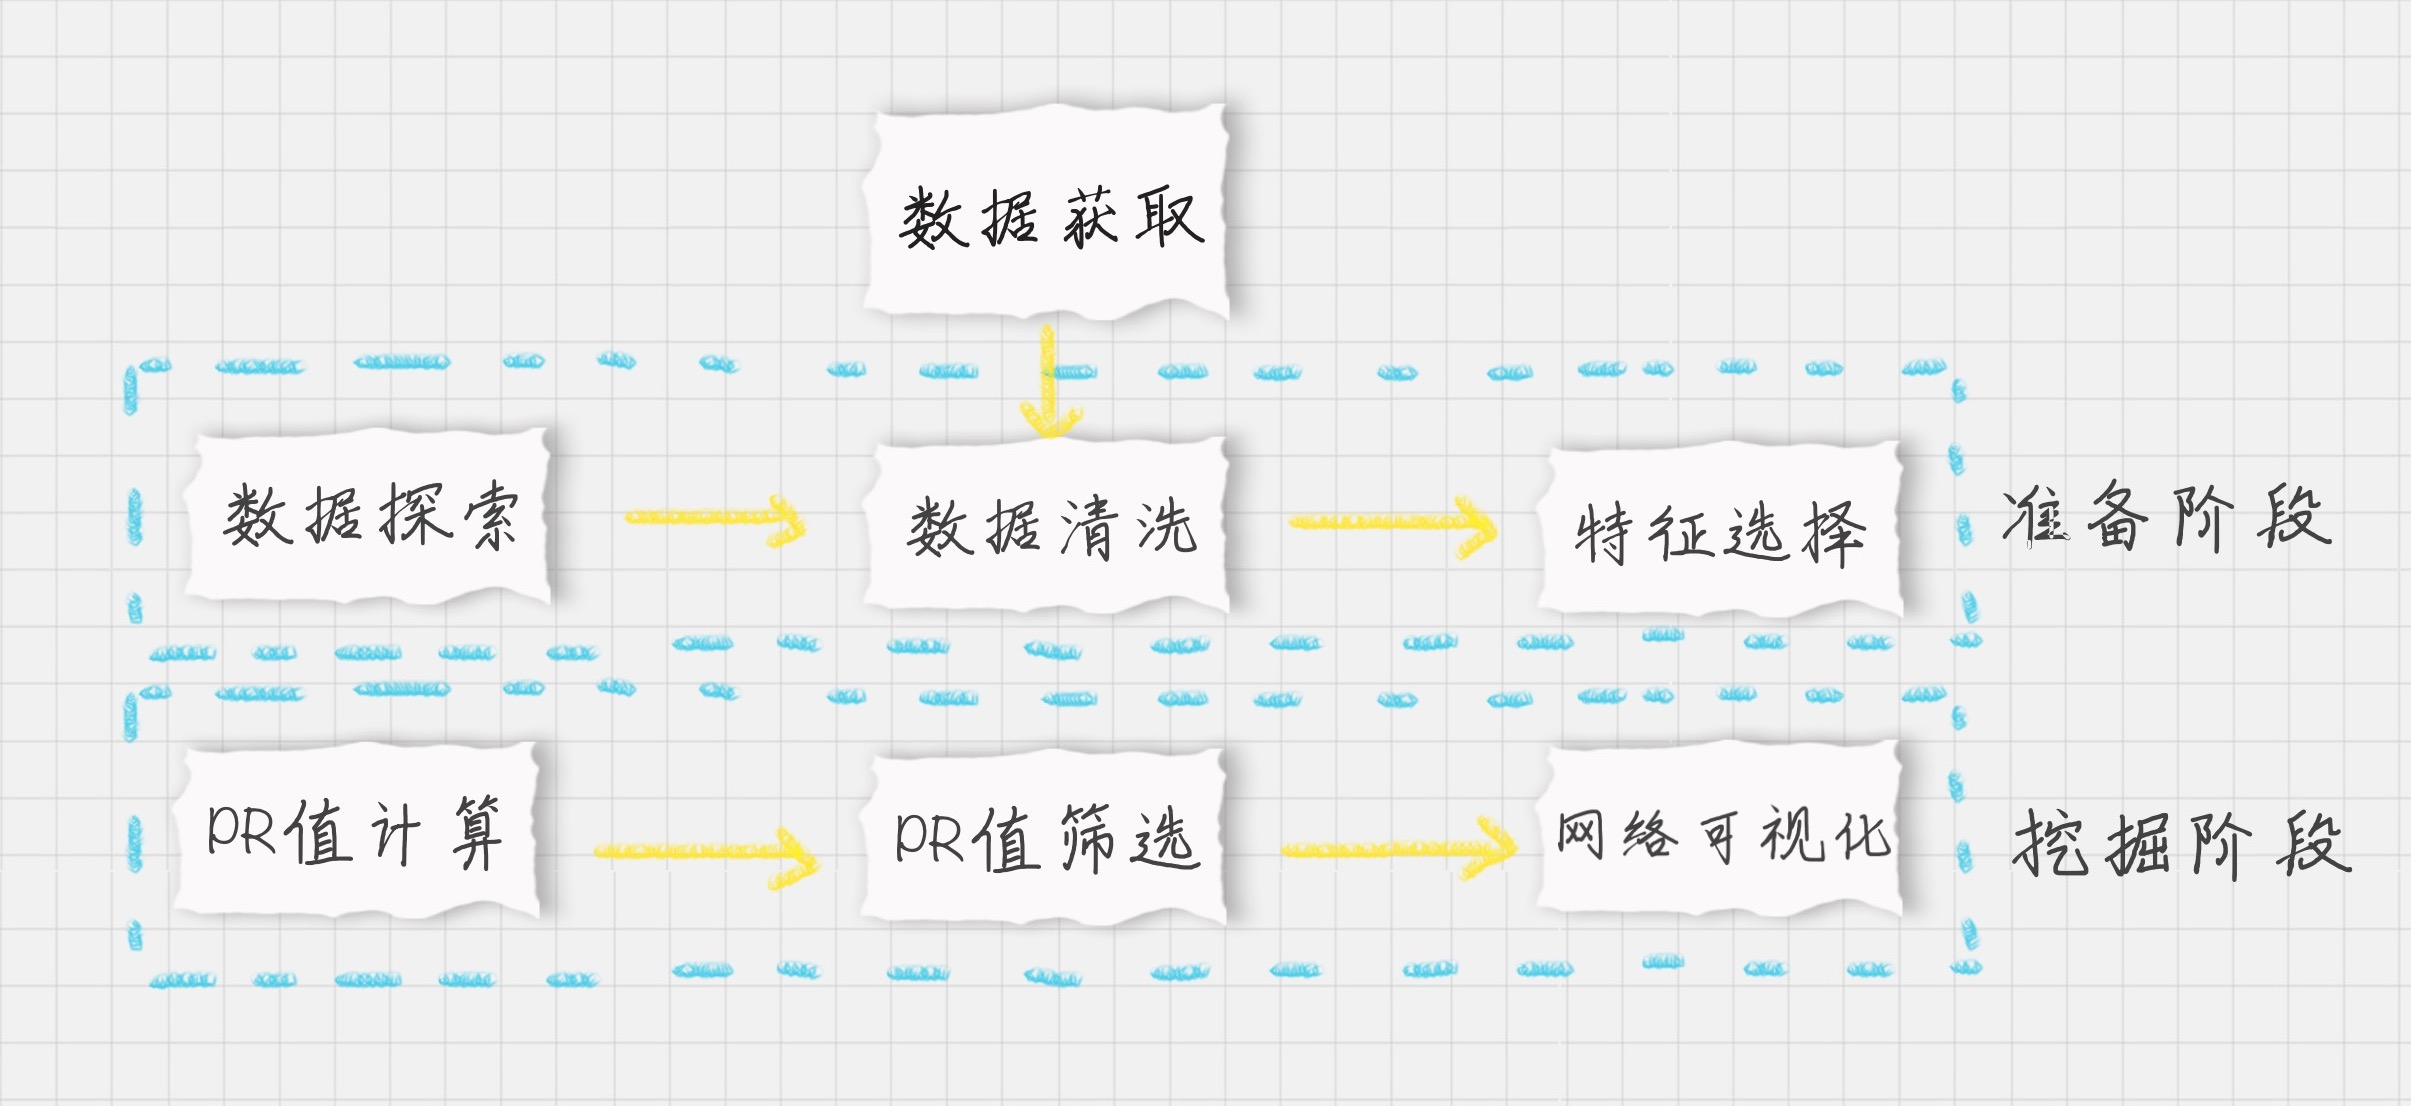

1、首先我们需要加载数据源；

2、在准备阶段：我们需要对数据进行探索，在数据清洗过程中，因为邮件中存在别名的情况，因此我们需要统一人物名称。另外邮件的正文并不在我们考虑的范围内，只统计邮件中的发送者和接收者，因此我们筛选 MetadataFrom 和 MetadataTo 这两个字段作为特征。同时，发送者和接收者可能存在多次邮件往来，需要设置权重来统计两人邮件往来的次数。次数越多代表这个边（从发送者到接收者的边）的权重越高；

3、在挖掘阶段：我们主要是对已经设置好的网络图进行 PR 值的计算，但邮件中的人物有 500 多人，有些人的权重可能不高，我们需要筛选 PR 值高的人物，绘制出他们之间的往来关系。在可视化的过程中，我们可以通过节点的 PR 值来绘制节点的大小，PR 值越大，节点的绘制尺寸越大。

设置好流程之后，实现的代码如下：

In [2]:

# -*- coding: utf-8 -*-
# 用 PageRank 挖掘希拉里邮件中的重要任务关系
import pandas as pd
import networkx as nx
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
# 数据加载
emails = pd.read_csv("./input/Emails.csv")
# 读取别名文件
file = pd.read_csv("./input/Aliases.csv")
aliases = {}
for index, row in file.iterrows():
    aliases[row['Alias']] = row['PersonId']
# 读取人名文件
file = pd.read_csv("./input/Persons.csv")
persons = {}
for index, row in file.iterrows():
    persons[row['Id']] = row['Name']
# 针对别名进行转换        
def unify_name(name):
    # 姓名统一小写
    name = str(name).lower()
    # 去掉, 和 @后面的内容
    name = name.replace(",","").split("@")[0]
    # 别名转换
    if name in aliases.keys():
        return persons[aliases[name]]
    return name
# 画网络图
def show_graph(graph, layout='spring_layout'):
    # 使用 Spring Layout 布局，类似中心放射状
    if layout == 'circular_layout':
        positions=nx.circular_layout(graph)
    else:
        positions=nx.spring_layout(graph)
    # 设置网络图中的节点大小，大小与 pagerank 值相关，因为 pagerank 值很小所以需要 *20000
    nodesize = [x['pagerank']*20000 for v,x in graph.nodes(data=True)]
    # 设置网络图中的边长度
    edgesize = [np.sqrt(e[2]['weight']) for e in graph.edges(data=True)]
    # 绘制节点
    nx.draw_networkx_nodes(graph, positions, node_size=nodesize, alpha=0.4)
    # 绘制边
    nx.draw_networkx_edges(graph, positions, edge_size=edgesize, alpha=0.2)
    # 绘制节点的 label
    nx.draw_networkx_labels(graph, positions, font_size=10)
    # 输出希拉里邮件中的所有人物关系图
    plt.show()
# 将寄件人和收件人的姓名进行规范化
emails.MetadataFrom = emails.MetadataFrom.apply(unify_name)
emails.MetadataTo = emails.MetadataTo.apply(unify_name)
# 设置遍的权重等于发邮件的次数
edges_weights_temp = defaultdict(list)
for row in zip(emails.MetadataFrom, emails.MetadataTo, emails.RawText):
    temp = (row[0], row[1])
    if temp not in edges_weights_temp:
        edges_weights_temp[temp] = 1
    else:
        edges_weights_temp[temp] = edges_weights_temp[temp] + 1
# 转化格式 (from, to), weight => from, to, weight
edges_weights = [(key[0], key[1], val) for key, val in edges_weights_temp.items()]
# 创建一个有向图
graph = nx.DiGraph()
# 设置有向图中的路径及权重 (from, to, weight)
graph.add_weighted_edges_from(edges_weights)
# 计算每个节点（人）的 PR 值，并作为节点的 pagerank 属性
pagerank = nx.pagerank(graph)
# 将 pagerank 数值作为节点的属性
nx.set_node_attributes(graph, name = 'pagerank', values=pagerank)
# 画网络图
show_graph(graph)

# 将完整的图谱进行精简
# 设置 PR 值的阈值，筛选大于阈值的重要核心节点
pagerank_threshold = 0.005
# 复制一份计算好的网络图
small_graph = graph.copy()
# 剪掉 PR 值小于 pagerank_threshold 的节点
for n, p_rank in graph.nodes(data=True):
    if p_rank['pagerank'] < pagerank_threshold: 
        small_graph.remove_node(n)
# 画网络图,采用circular_layout布局让筛选出来的点组成一个圆
show_graph(small_graph, 'circular_layout')

FileNotFoundError: [Errno 2] No such file or directory: './input/Emails.csv'

针对代码中的几个模块我做个简单的说明：

1. 函数定义

人物的名称需要统一，因此我设置了 unify_name 函数，同时设置了 show_graph 函数将网络图可视化。NetworkX 提供了多种可视化布局，这里我使用 spring_layout 布局，也就是呈中心放射状。

除了 spring_layout 外，NetworkX 还有另外三种可视化布局，circular_layout（在一个圆环上均匀分布节点），random_layout（随机分布节点 ），shell_layout（节点都在同心圆上）。

2. 计算边权重

邮件的发送者和接收者的邮件往来可能不止一次，我们需要用两者之间邮件往来的次数计算这两者之间边的权重，所以我用 edges_weights_temp 数组存储权重。而上面介绍过在 NetworkX 中添加权重边（即使用 add_weighted_edges_from 函数）的时候，接受的是 u、v、w 的三元数组，因此我们还需要对格式进行转换，具体转换方式见代码。

3.PR 值计算及筛选我使用 nx.pagerank(graph) 计算了节点的 PR 值。由于节点数量很多，我们设置了 PR 值阈值，即 pagerank_threshold=0.005，然后遍历节点，删除小于 PR 值阈值的节点，形成新的图 small_graph，最后对 small_graph 进行可视化（对应运行结果的第二张图）。总结在上节课中，我们通过矩阵乘法求得网页的权重，这节课我们使用 NetworkX 可以得到相同的结果。另外我带你用 PageRank 算法做了一次实战，我们将一个复杂的网络图，通过 PR 值的计算、筛选，最终得到了一张精简的网络图。在这个过程中我们学习了 NetworkX 工具的使用，包括创建图、节点、边及 PR 值的计算。实际上掌握了 PageRank 的理论之后，在实战中往往就是一行代码的事。但项目与理论不同，项目中涉及到的数据量比较大，你会花 80% 的时间（或 80% 的代码量）在预处理过程中，比如今天的项目中，我们对别名进行了统一，对边的权重进行计算，同时还需要把计算好的结果以可视化的方式呈现。

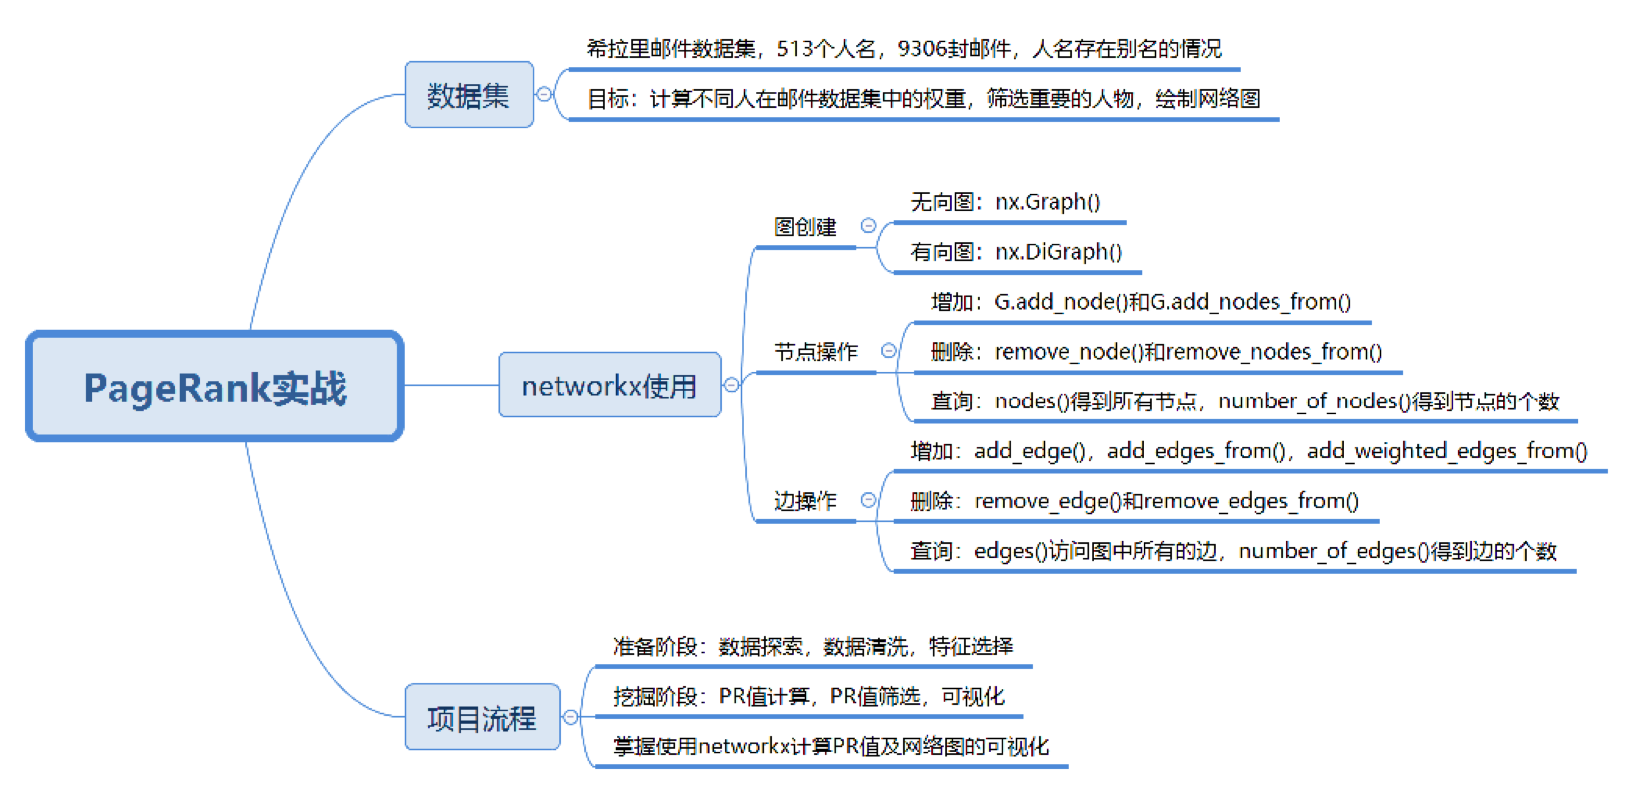

今天我举了一个网页权重的例子，假设一共有 4 个网页 A、B、C、D。它们之间的链接信息如文章中的图示。我们假设用户有 15% 的概率随机跳转，请你编写代码重新计算这 4 个节点的 PR 值。